# Capstone Project 1 - Subscription for Bank Deposits 

**Problem**: Companies spend tremendous amounts of money on marketing in order to drive sales, but not all investments bring results. Even with the significant advancements in the ability to target the prospective customers, the targeting of the marketing campaigns is still not very precise and substantial amounts of money are still spent on marketing to the wrong audience. At the same time, the companies are now collecting more data about their customers than ever, which gives an opportunity to use that data for better targeting and profit growth.

Telemarketing remains one of the most popular marketing vehicles. The customers are usually categorized by the age group, gender, level of income and so on. Based on this preliminary targeting, telemarketers “cold call” potential customers and try to filter out those who may be interested in the product. Naturally, a lot of telemarketers’ time is wasted on calling people who have no interest in what they offer. A better targeting, hence, presents a significant opportunity to increase the effect of the telemarketing campaigns.


**Client**: Though this analysis is focused on identifying the customers who are the most likely to subscribe for bank deposits, the classification approach employed in this project can be used by any company that uses telemarketing. Better prospective customer classification will allow companies to more effectively use their telemarketers’ time and get more return on their marketing investment.


**Data**: The data for this project are sourced from the UCI Machine Learning repository and represents the results of direct marketing campaigns (phone calls) of a Portuguese banking institution. The data set has 45,211 instances and 20 features (input variables), stored in a .csv file.

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing


**Method**: The expected result of the project is to predict if a customer subscribes for a deposit offer or will eventually decline it. Hence, a number of classification methods will be used, including Logistic Regression and Decision Trees.

**Deliverables**: The outcome of the project will be presented in a form of Jupyter notebook, as well as the PowerPoint presentation.

### General Information on the Data

**Overview**: The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

This dataset is based on "Bank Marketing" UCI dataset (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data are enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

**Number of Instances**: 41188

**Number of Attributes**: 20+ output attributes

**Input variables:**
   
  **General customer data**
   
   1. age (numeric)
  
   2. job (categorical): type of job 
       -  "admin."
       -  "blue-collar"
       -  "entrepreneur"
       -  "housemaid"
       -  "management"
       -  "retired"
       -  "self-employed"
       -  "services"
       -  "student"
       -  "technician"
       -  "unemployed"
       -  "unknown"
   3. marital (categorical): marital status
       -  "divorced" (means divorced or widowed)
       -  "married"
       -  "single"
       -  "unknown"
   4. education (categorical):
       -  "basic.4y"
       -  "basic.6y"
       -  "basic.9y"
       -  "high.school"
       -  "illiterate"
       -  "professional.course"
       -  "university.degree"
       -  "unknown"
   5. default (categorical): has defaulted on a credit? 
       -  "no"
       -  "yes"
       -  "unknown"
   6. housing (categorical): has a house loan? 
       -  "no"
       -  "yes"
       -  "unknown"
   7. loan: has personal loan? (categorical)
       -  "no"
       -  "yes"
       -  "unknown"
   
  **Data related to the last marketing contact with the customer**
  
   8. contact (categorical): contact communication type 
       -  "cellular"
       -  "telephone"
   9. month (categorical): last contact month of the year 
   
       -  "jan"
       -  "feb"
       -  "mar"
       -  "apr"
       -  "may"
       -  "jun"
       -  "jul"
       -  "aug"
       -  "sep"
       -  "oct"
       -  "nov"
       -  "dec"
      
  10. day_of_week (categorical): last contact day of the work week 
  
       -  "mon"
       -  "tue"
       -  "wed"
       -  "thu"
       -  "fri"
  11. duration (numeric): duration of the last contact in seconds (numeric). This attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 
 **Other data**
 
  12. campaign (numeric, includes last contact): number of contacts performed during this campaign and for this client 
  13. pdays (numeric): number of days that passed after the customer was last contacted during a previous merketing campaign; 999 means the customer was not previously contacted
  14. previous (numeric): number of contacts performed before this campaign and for this customer 
  15. poutcome (categorical): outcome of the previous marketing campaign
       -  "failure"
       -  "nonexistent"
       -  "success"
       
 **Social and economic context attributes**
 
  16. emp.var.rate (numeric): employment variation rate - quarterly indicator 
  17. cons.price.idx (numeric): consumer price index - monthly indicator    
  18. cons.conf.idx (numeric): consumer confidence index - monthly indicator    
  19. euribor3m (numeric): euribor 3 month rate - daily indicator
  20. nr.employed (numeric): number of employees - quarterly indicator 

 **Output variable (desired target)**:
 
  21. y (binary): has the customer subscribed for a deposit?
       -  "yes"
       -  "no"

**Missing Attribute Values**: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

## Step 1 - Exploratory Data Analysis

**Loading required libraries and the dataset**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/Raw_data/bank-additional-full.csv', sep=';')

**Parameters of the dataset**

Let's look at the overall characteristics of the dataset, starting with the dataset shape, number and types of variables, and the overall distribution of the numerical variables. Before doing the analysis, let's drop the duplicates from the dataset.

In [6]:
df = df.drop_duplicates()
df.shape

(41176, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

We have 21 variables (10 numeric and 11 string) and 41,176 non-duplicate rows. There are no missing values. All string variables are categorical, so they need to be converted accordingly.

In [86]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null category
marital           41176 non-null category
education         41176 non-null category
default           41176 non-null category
housing           41176 non-null category
loan              41176 non-null category
contact           41176 non-null category
month             41176 non-null category
day_of_week       41176 non-null category
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null category
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null category
dtypes: category(11), float64

Let's also look at the number of entries per each level of the categorical variables:

In [94]:
df.job.value_counts()/41176

df.marital.value_counts()/41176

df.y.value_counts()/41176

#count_list = [df.job.value_counts(), df.marital.value_counts(), df.education.value_counts(), df.default.value_counts(),
        #     df.housing.value_counts(), df.loan.value_counts(), df.contact.value_counts(), df.month.value_counts(),
        #     df.day_of_week.value_counts(), df.poutcome.value_counts(), df.y.value_counts()]


#df.describe()

no     0.887337
yes    0.112663
Name: y, dtype: float64

There are no missing values - all columns have 41,188 non-null rows. There are no variables with the obviously wrong or suspicious values. 

In [17]:
df.marital = df.marital.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null category
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: category(1), float64(5), int64(5), object

In [12]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Are the negative values valid?

What to drop: duration,

- Tidy data - what columns can be combined/formatted?
- do graphs of the numeric variables where makes sense. anything unusual?
- do correlation graphs for some of the variables - anything interesting?
- what assumptions to make about the relationships and test on the data?
- check EDS - what are the exploratory steps there?
- Outliers?
- Outcome of the campains - are the vast majority of campaigns successful? Are they imbalanced or more or less 50/50 in proportion? Check input variables and output variables
- I have the answers of the campaigns already, so if too many failures, I need to figure out what to do
- Add some missing data - add random numbers/drop some numbers 
- (after all distributions analyzed and comments about imbalances) fit very simple models first and then discuss next steps with Hassan, how do we go from there - that what should be in the milestone report.


Do the above for all columns and look what to correct (e.g., the admin. name)

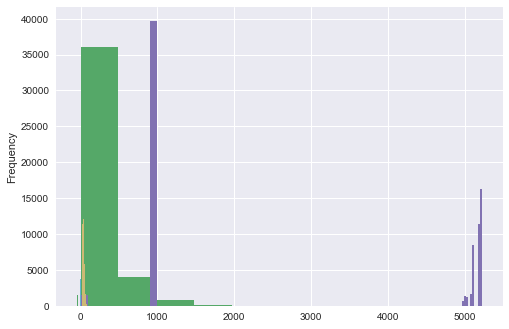

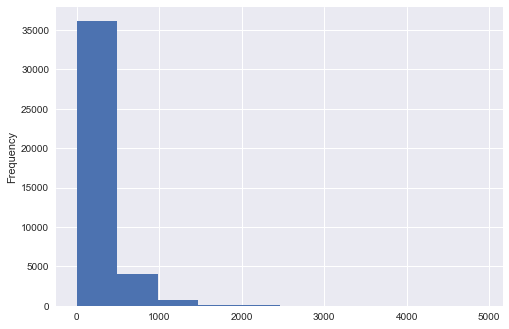

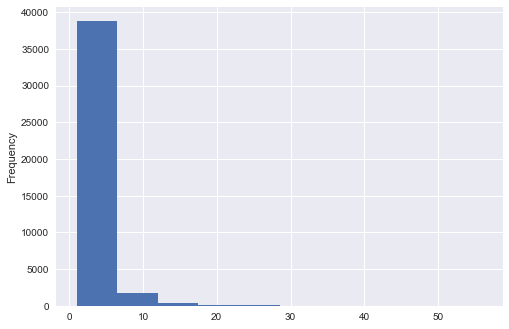

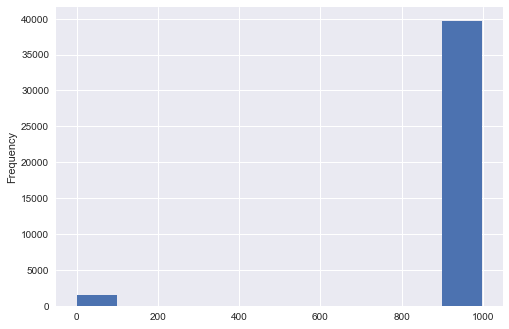

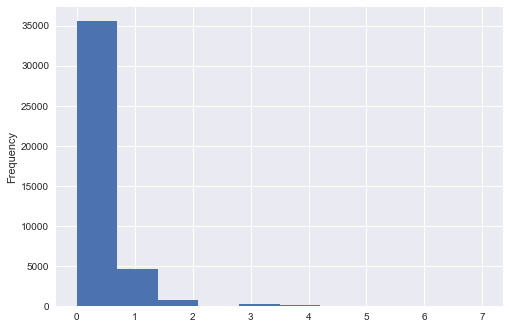

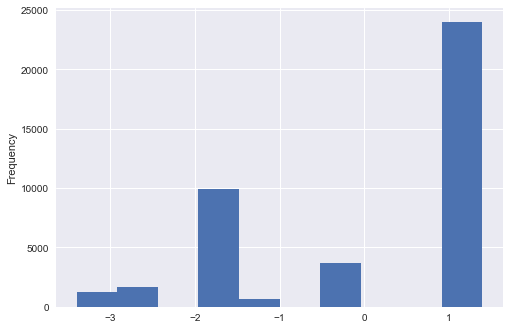

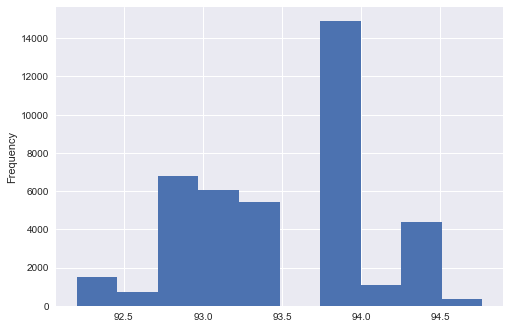

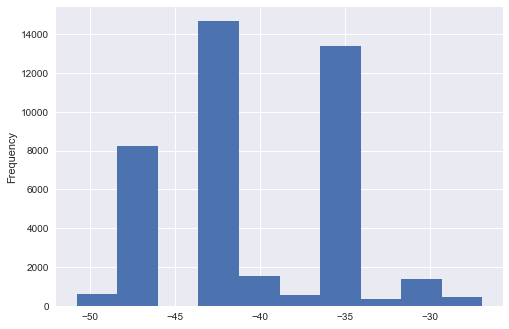

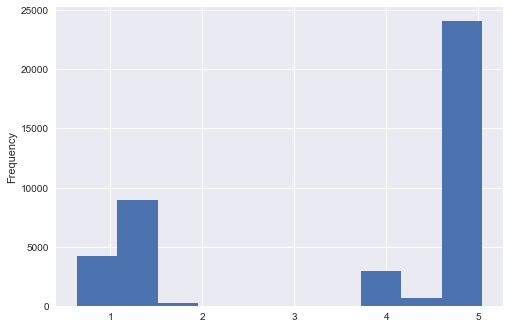

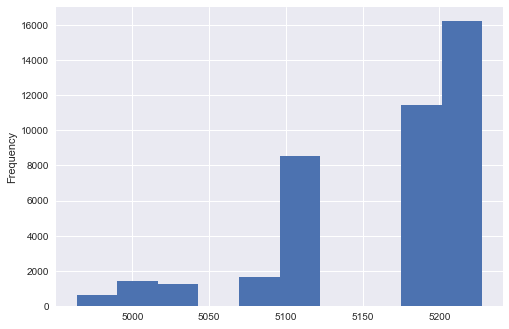

In [33]:
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
for column in numeric_columns:
    df[column].plot('hist')
    plt.show()